<a href="https://colab.research.google.com/github/ribeirolucas962/Analises-de-Clusteriza-o/blob/main/cluster_de_vinho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importando bibliotecas

In [ ]:
import pandas as pd
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from yellowbrick.cluster import kelbow_visualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
df_wines = pd.read_csv('/content/winequality-red.csv')
df_wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df_wines.duplicated().any()

True

In [ ]:
df_wines_copy = df_wines.copy()
df_wines.drop_duplicates(inplace=True)

In [ ]:
df_wines.duplicated().any()

False

In [ ]:
df_wines.isna().sum().any()

False

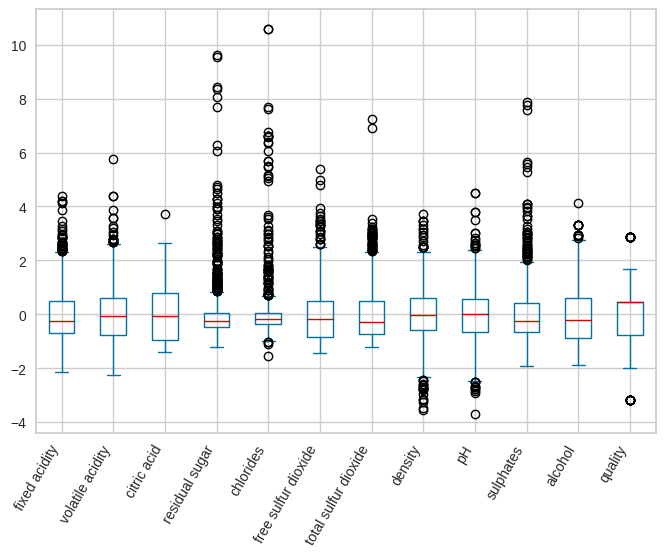

In [ ]:
df_wines_scaled= df_wines.apply(scale)
df_wines_scaled.plot.box()
plt.xticks(rotation=60, ha='right');

In [ ]:
df_wines_scaled.abs().gt(8)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,False,False,False,False,False,False,False,False,False,False,False,False
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
outlier_rows = df_wines_scaled.abs().gt(3).any(axis=1)
outlier_rows.sum()

127

In [ ]:
df_wines_scaled = df_wines_scaled[~outlier_rows]

In [ ]:
outlier_rows = df_wines_scaled.abs().gt(3).any(axis=1)
outlier_rows.sum()

0

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

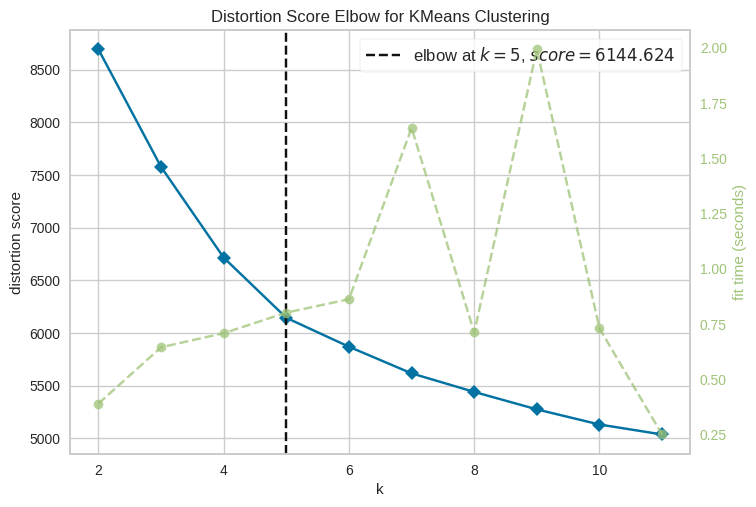

In [ ]:
kelbow_visualizer(KMeans(), df_wines_scaled, k=11);

In [ ]:
model = KMeans(4, random_state=0).fit(df_wines_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
centroids = model.cluster_centers_
labels = model.labels_

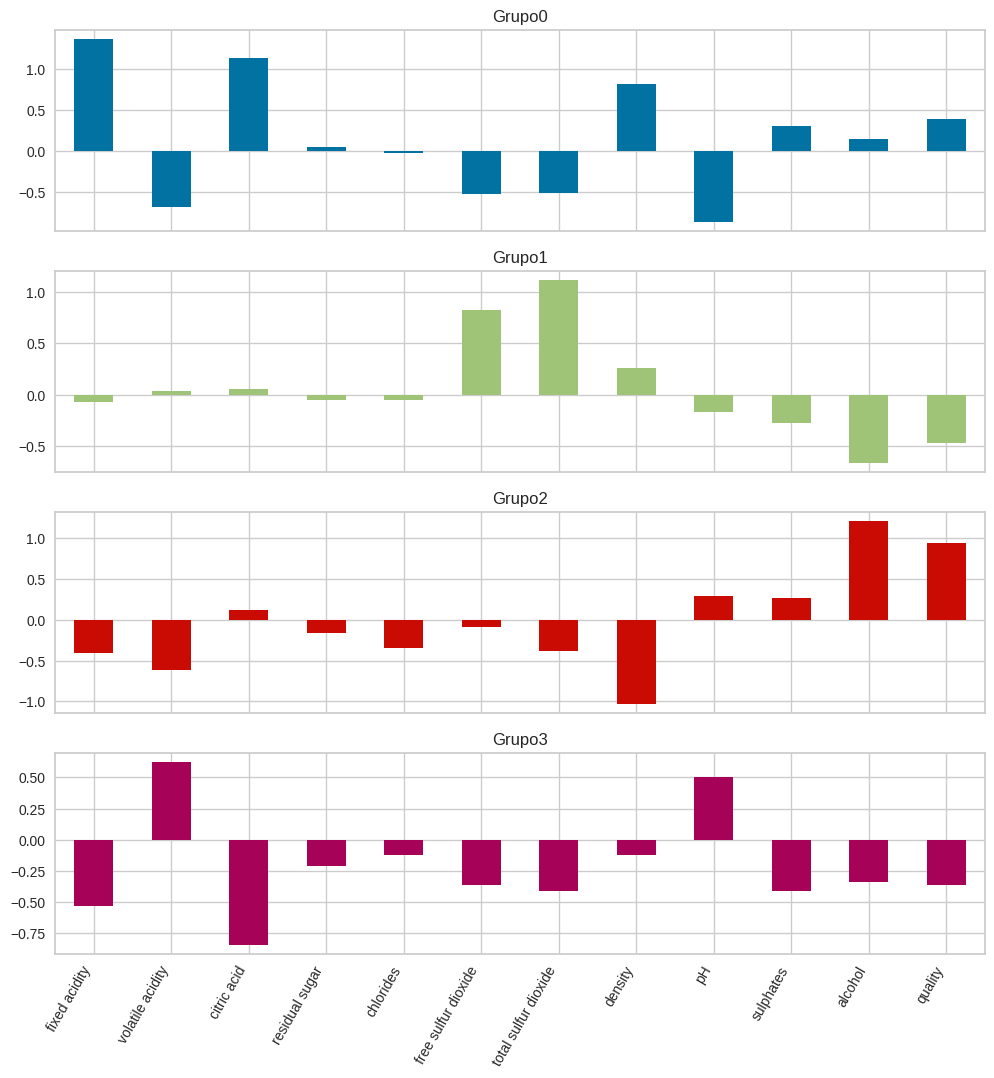

In [ ]:
pd.DataFrame(centroids, columns=df_wines_scaled.columns).T.add_prefix('Grupo').plot.bar(subplots=True, figsize=(12,12), legend=False)
plt.xticks(rotation=60, ha='right')
plt.tight_layout
plt.show()

In [ ]:
centeres = pd.DataFrame(centroids, columns=df_wines.columns)
centeres

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.362937,-0.676950,1.136989,0.053511,-0.029282,-0.520142,-0.509625,0.810579,-0.857203,0.303166,0.142244,0.391709
1,-0.066128,0.042789,0.059583,-0.047264,-0.047947,0.824126,1.117007,0.260676,-0.162434,-0.273721,-0.658198,-0.470483
2,-0.408303,-0.621540,0.118273,-0.161166,-0.343020,-0.085537,-0.378282,-1.028705,0.292796,0.264874,1.210304,0.945476
3,-0.534503,0.623858,-0.846097,-0.211949,-0.124245,-0.364212,-0.413993,-0.125008,0.502818,-0.413361,-0.341980,-0.364863


In [ ]:
silhouette_score(df_wines_scaled[~outlier_rows], labels)

0.1796855539007706